In [2]:
import pandas as pd
import numpy as np
fichero = "C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Sistemas de Aprendizaxe Automático\\archivos\\winequality-red.csv"
datos = pd.read_csv(fichero)

## Información general de los datos

In [3]:
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
datos.size

19188

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Histograma de todas las columnas

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

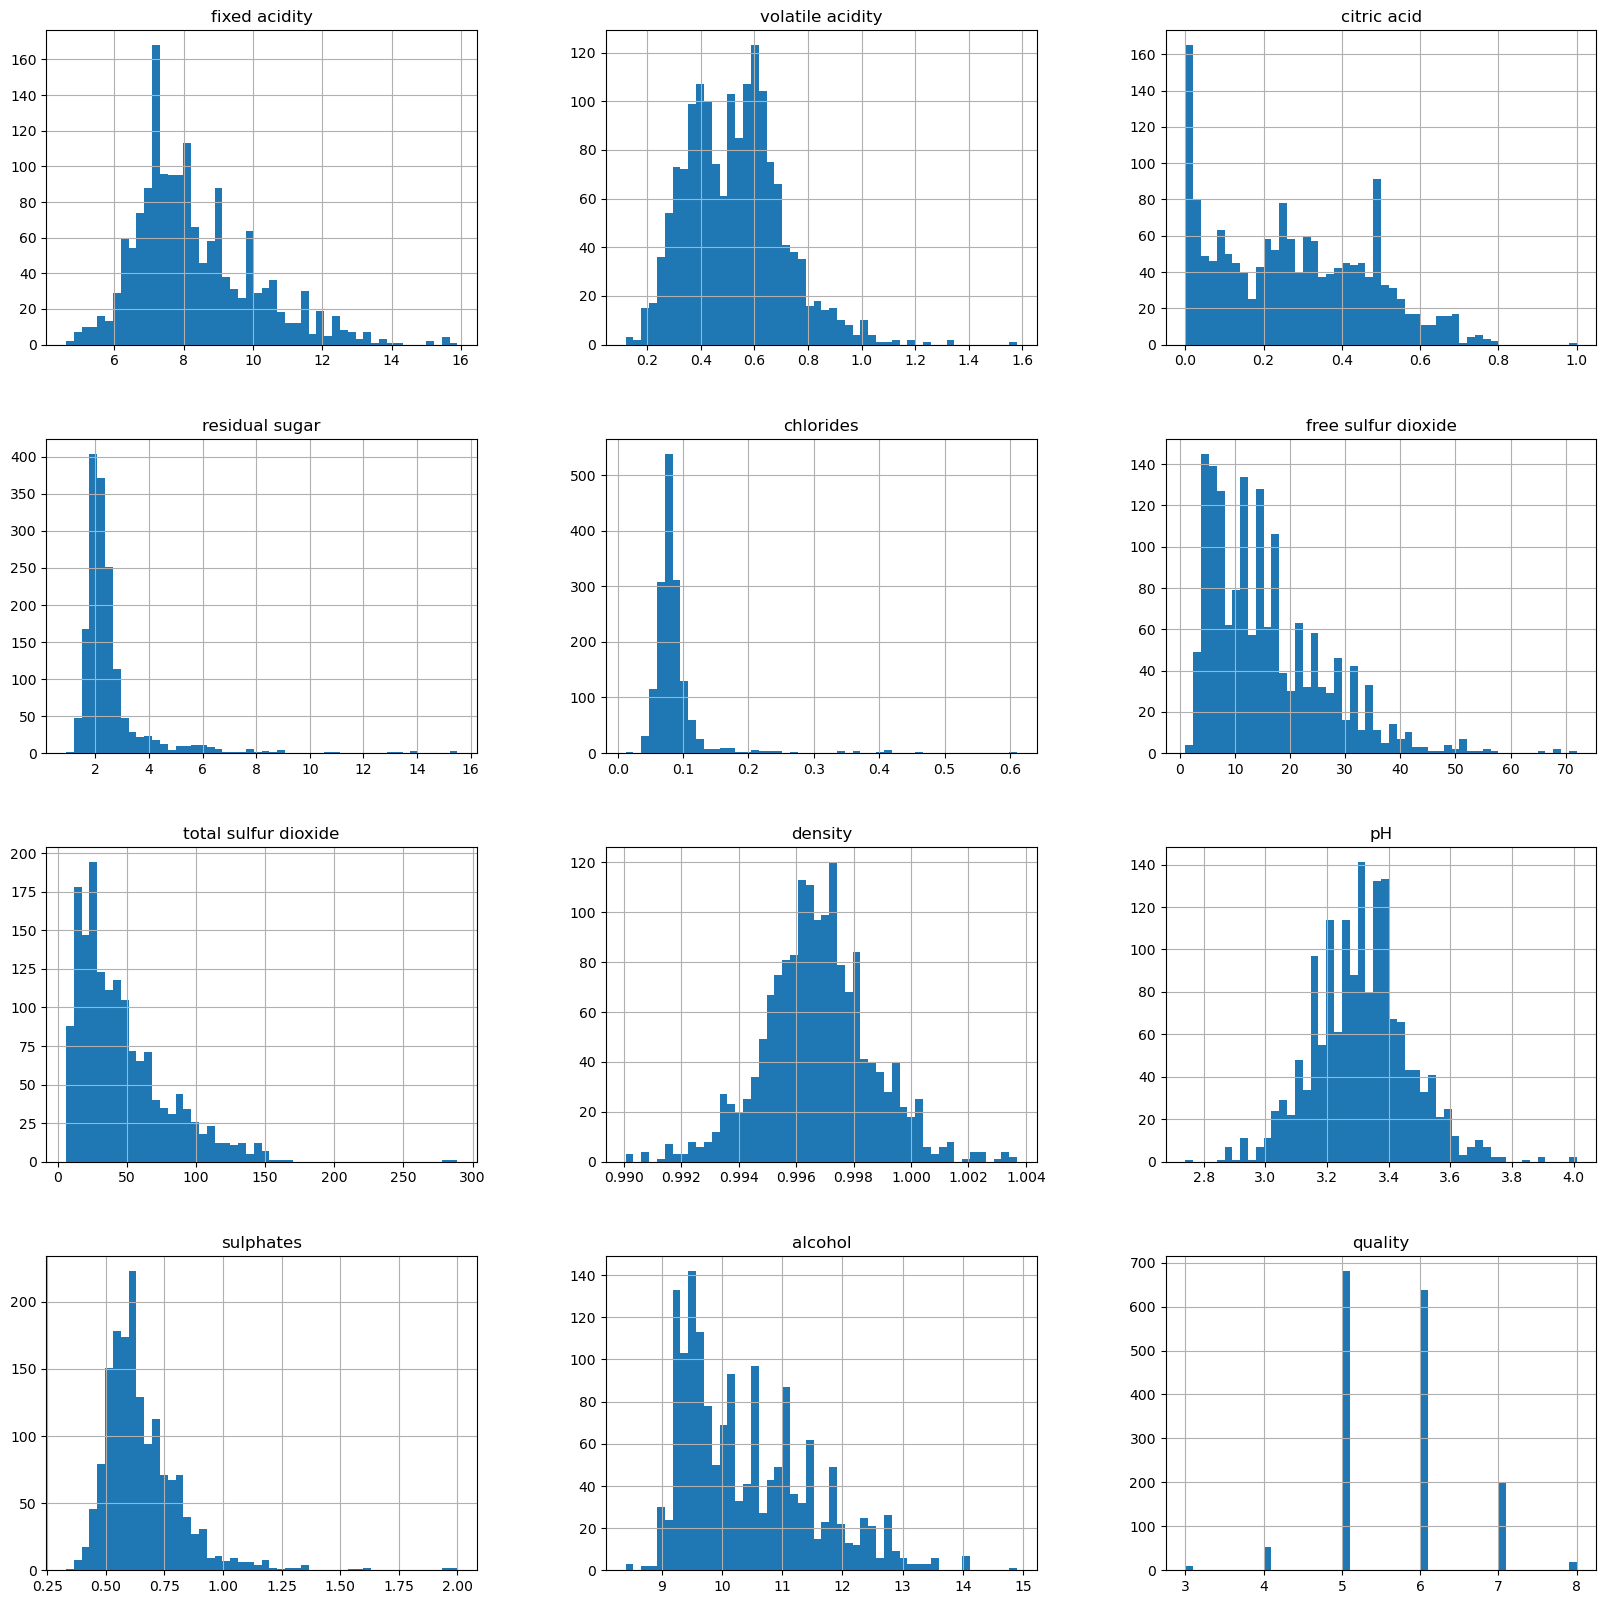

In [6]:
datos.hist(bins=50, figsize=(20, 20))

> Histograma scatter que mostrará en el eje X el alcohol y en el eje Y la acidez, y en el color de los puntos la calidad

<Axes: xlabel='alcohol', ylabel='pH'>

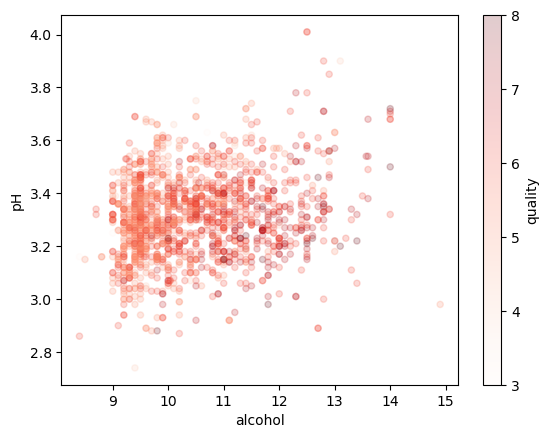

In [7]:
datos.plot(kind="scatter", x = "alcohol", y = "pH",
           alpha=0.2,
           c="quality",
           cmap="Reds")

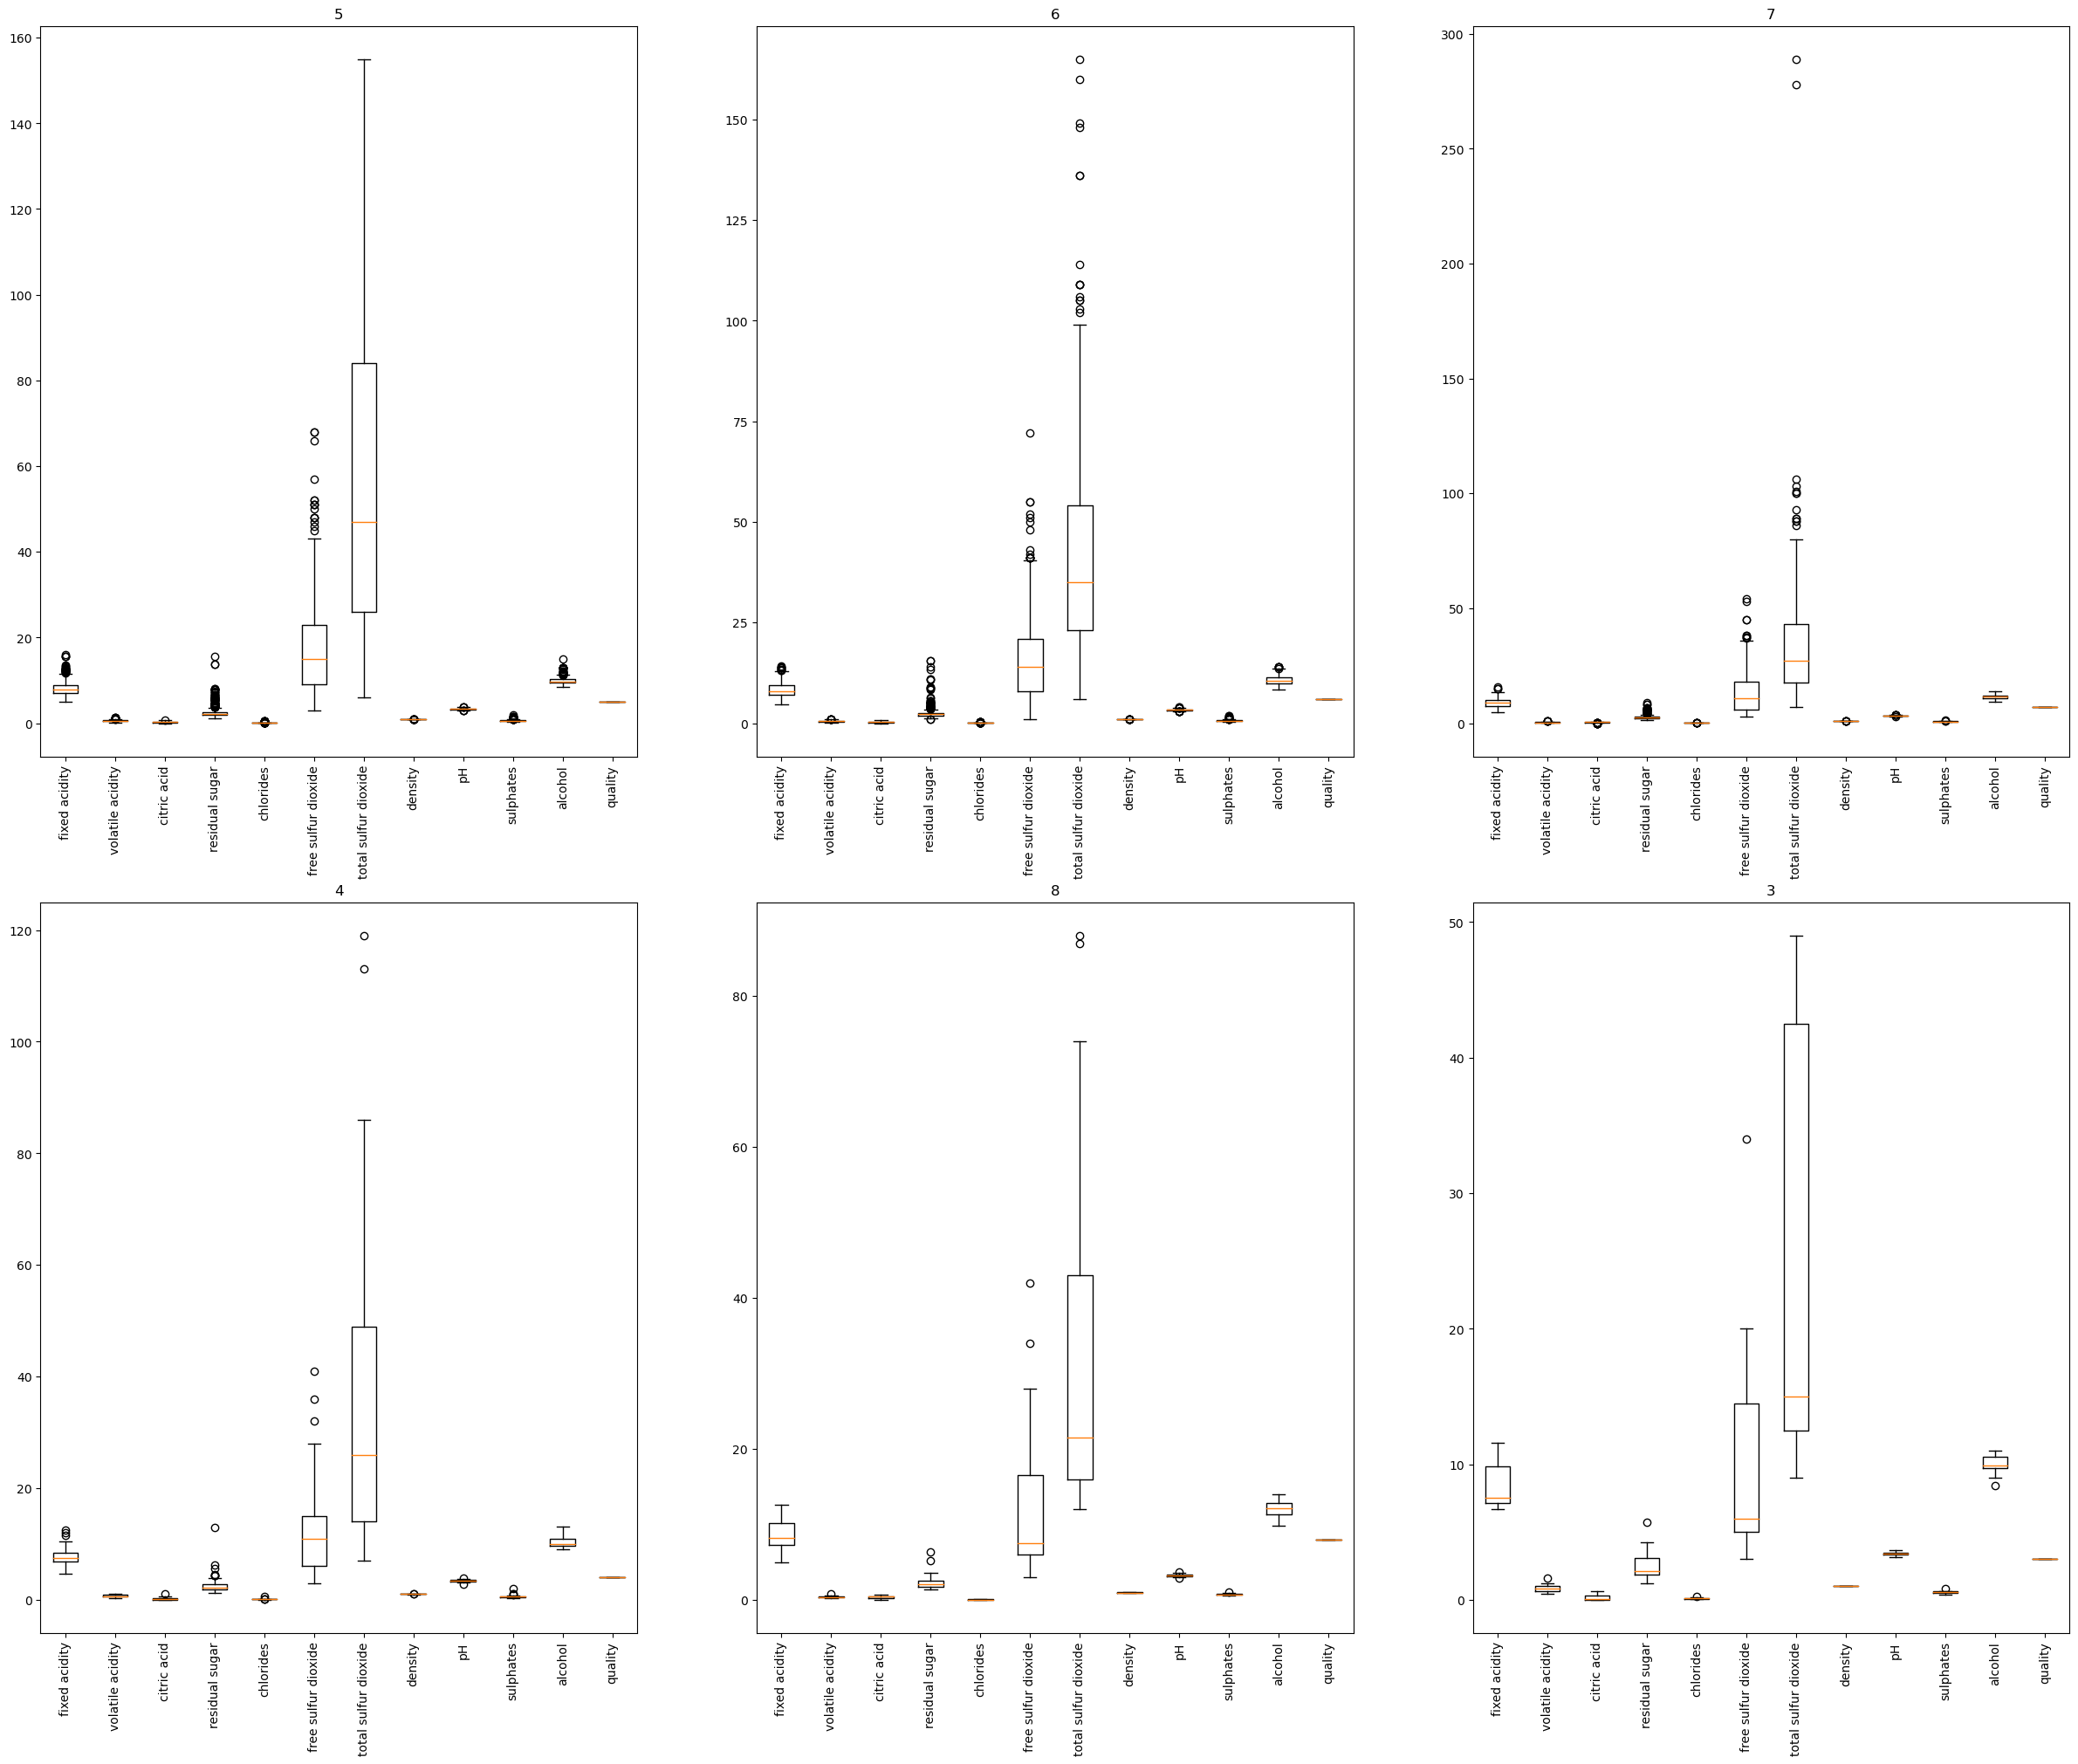

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,50))
for ax_i, quality in enumerate(datos["quality"].unique()):
    ax = plt.subplot(4,3, ax_i+1)
    data_filtered = datos[datos["quality"] == quality]
    ax.boxplot([data_filtered["fixed acidity"], 
                data_filtered["volatile acidity"], 
                data_filtered["citric acid"],
                data_filtered["residual sugar"],
                data_filtered["chlorides"],
                data_filtered["free sulfur dioxide"],
                data_filtered["total sulfur dioxide"],
                data_filtered["density"],
                data_filtered["pH"],
                data_filtered["sulphates"],
                data_filtered["alcohol"],
                data_filtered["quality"]])
    ax.set_title(quality)
    ax.set_xticklabels(["fixed acidity",
                        "volatile acidity", 
                        "citric acid", 
                        "residual sugar", 
                        "chlorides", 
                        "free sulfur dioxide",
                        "total sulfur dioxide",
                        "density", 
                        "pH", 
                        "sulphates", 
                        "alcohol", 
                        "quality"], rotation=90) 

### Matriz de correlación y mapa de calor

<Axes: >

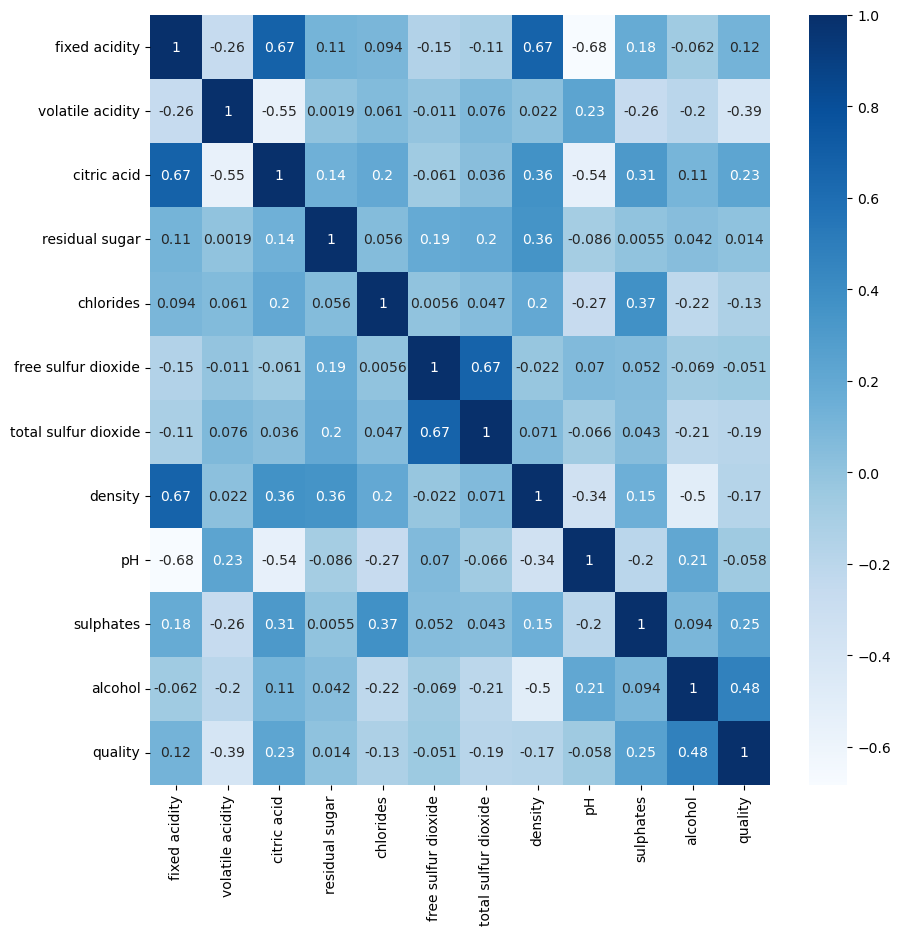

In [34]:
import seaborn as sns

# Matriz de correlación
corr = datos.select_dtypes('number').corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr, annot=True, cmap="Blues")   # El annot es para mostrar los datos

### Scatter cruzado de las columnas más prometedoras

array([[<Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='pH', ylabel='alcohol'>,
        <Axes: xlabel='density', ylabel='alcohol'>,
        <Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='residual sugar', ylabel='alcohol'>],
       [<Axes: xlabel='alcohol', ylabel='pH'>,
        <Axes: xlabel='pH', ylabel='pH'>,
        <Axes: xlabel='density', ylabel='pH'>,
        <Axes: xlabel='citric acid', ylabel='pH'>,
        <Axes: xlabel='residual sugar', ylabel='pH'>],
       [<Axes: xlabel='alcohol', ylabel='density'>,
        <Axes: xlabel='pH', ylabel='density'>,
        <Axes: xlabel='density', ylabel='density'>,
        <Axes: xlabel='citric acid', ylabel='density'>,
        <Axes: xlabel='residual sugar', ylabel='density'>],
       [<Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='pH', ylabel='citric acid'>,
        <Axes: xlabel='density', ylabel='citric acid'>,
        <Axes: xlabel='citric acid', ylabel='citric acid'>,
 

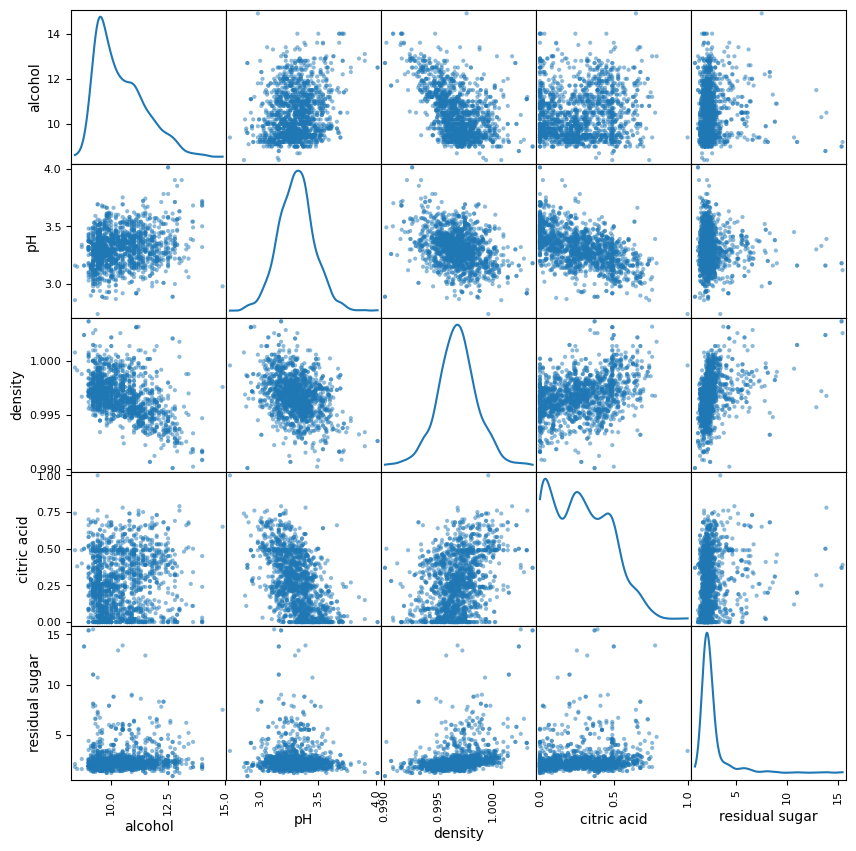

In [41]:
from pandas.plotting import scatter_matrix

atributos = ["alcohol","pH","density","citric acid","residual sugar"]
# Crear un scatter_matrix
scatter_matrix(datos[atributos], figsize=(10,10), diagonal='kde')



## Entrenamiento de modelo